Epoch 1/200
38/38 [==============================] - 2s 14ms/step - loss: 32.7425 - val_loss: 23.2161
Epoch 2/200
38/38 [==============================] - 0s 7ms/step - loss: 15.1170 - val_loss: 4.2057
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 6.6586 - val_loss: 2.0854
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 5.7898 - val_loss: 2.1983
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 5.3882 - val_loss: 2.0126
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 4.3838 - val_loss: 1.7704
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 4.1222 - val_loss: 1.5484
Epoch 8/200
38/38 [==============================] - 0s 3ms/step - loss: 4.1033 - val_loss: 1.7702
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 3.4679 - val_loss: 1.5837
Epoch 10/200
38/38 [==============================] - 0s 4ms/step - loss: 3.3839 - val_loss: 1.3055
Epoch

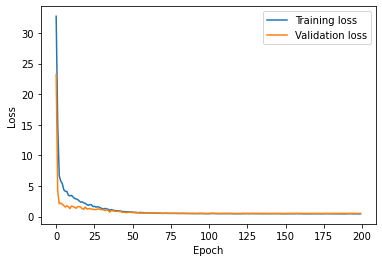

43/43 [==============================] - 0s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import csv
from google.colab import files
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# Load the training data
df = pd.read_csv('/content/train.csv')

# Data cleaning
# Get rid of errors and inconsistency
df = df.loc[df["fixed acidity"] >= 0]
df = df.loc[df["volatile acidity"] >= 0]
df = df.loc[df["citric acid"] >= 0]
df = df.loc[df["citric acid"] >= 0]
df = df.loc[df["residual sugar"] >= 0]
df = df.loc[df["chlorides"] >= 0]
df = df.loc[df["free sulfur dioxide"] >= 0]
df = df.loc[df["total sulfur dioxide"] >= 0]
df = df.loc[df["density"] >= 0]
df = df.loc[df["pH"] >= 0]
df = df.loc[df['pH'] < 14]    # in particular, pH-value cannot never exceed 14 
df = df.loc[df["sulphates"] >= 0]
df = df.loc[df["alcohol"] >= 0]

# All data types converted optimally
df = df.astype({'Id': 'int32', 'fixed acidity' : 'float32','volatile acidity' : 'float32', 'citric acid': 'float32', 'residual sugar': 'float32', 'chlorides': 'float32','free sulfur dioxide': 'float32', 'total sulfur dioxide': 'float32', 'density':'float32','pH':'float32', 'sulphates': 'float32','alcohol':'float32','quality' : 'int16'})

# Handle missing value and outliers
df = df.loc[df["fixed acidity"] > 8.365175 - 3*1.705390]
df = df.loc[df["fixed acidity"] < 8.365175 + 3*1.705390]
df = df.loc[df["volatile acidity"] > 0.527601 - 3*0.173164]
df = df.loc[df["volatile acidity"] < 0.527601 + 3*0.173164]
df = df.loc[df["citric acid"] > 0.265058 - 3*0.188267]
df = df.loc[df["citric acid"] < 0.265058 + 3*0.188267]
df = df.loc[df["residual sugar"] > 2.398881 - 3*0.858824]
df = df.loc[df["residual sugar"] < 2.398881 + 3*0.858824]
df = df.loc[df["chlorides"] > 0.081856 - 3*0.023729]
df = df.loc[df["chlorides"] < 0.081856 + 3*0.023729]
df = df.loc[df["free sulfur dioxide"] > 16.955982 - 3*10.009709]
df = df.loc[df["free sulfur dioxide"] < 16.955982 + 3*10.009709]
df = df.loc[df["total sulfur dioxide"] > 49.236866 - 3*32.961143]
df = df.loc[df["total sulfur dioxide"] < 49.236866 + 3*32.961143]
df = df.loc[df["density"] > 0.996748 - 3*0.001827]
df = df.loc[df["density"] < 0.996748 + 3*0.001827]
df = df.loc[df["pH"] > 3.310569 - 3*0.142321]
df = df.loc[df["pH"] < 3.310569 + 3*0.142321]
df = df.loc[df["sulphates"] > 0.641308 - 3*0.137942]
df = df.loc[df["sulphates"] < 0.641308 + 3*0.137942]
df = df.loc[df["alcohol"] > 10.414972 - 3*1.028825]
df = df.loc[df["alcohol"] < 10.414972 + 3*1.028825]
df = df.drop_duplicates()
# we define data points more than 2 standard deviation away from the mean to be outliers

df = df.dropna()
# drop rows with any column having NA/null data







##Split the data into features and labels
X = df.drop(['quality'], axis=1)
y = df['quality']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Define the column transformer
preprocessor = make_column_transformer(
(StandardScaler(), make_column_selector(dtype_include=np.number)),
(OneHotEncoder(), make_column_selector(dtype_include=object))
)

#Fit the preprocessor to the training data
preprocessor.fit(X_train)

#Transform the training and testing data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

#Define the model architecture
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
layers.Dropout(0.5),
layers.Dense(32, activation='relu'),
layers.Dropout(0.5),
layers.Dense(16, activation='relu'),
layers.Dense(1)
])

#Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

#Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

#Evaluate the model on the testing data
test_loss = model.evaluate(X_test, y_test)

#Plot the training and validation loss over the epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Make predictions on the test data

test_df = pd.read_csv('/content/test.csv')
test_df = preprocessor.transform(test_df)
predictions = model.predict(test_df)

# Round the predicted values of quality to the nearest integer
predictions = np.round(predictions)

#Save the predictions to a CSV file
submission = pd.DataFrame({'Id': range(2056, 2056 + len(predictions)), 'quality': predictions.ravel()})
submission.to_csv('submission.csv', index=False)

#Download the CSV file
files.download('submission.csv')


Text(0.5, 1.0, 'Correlation')

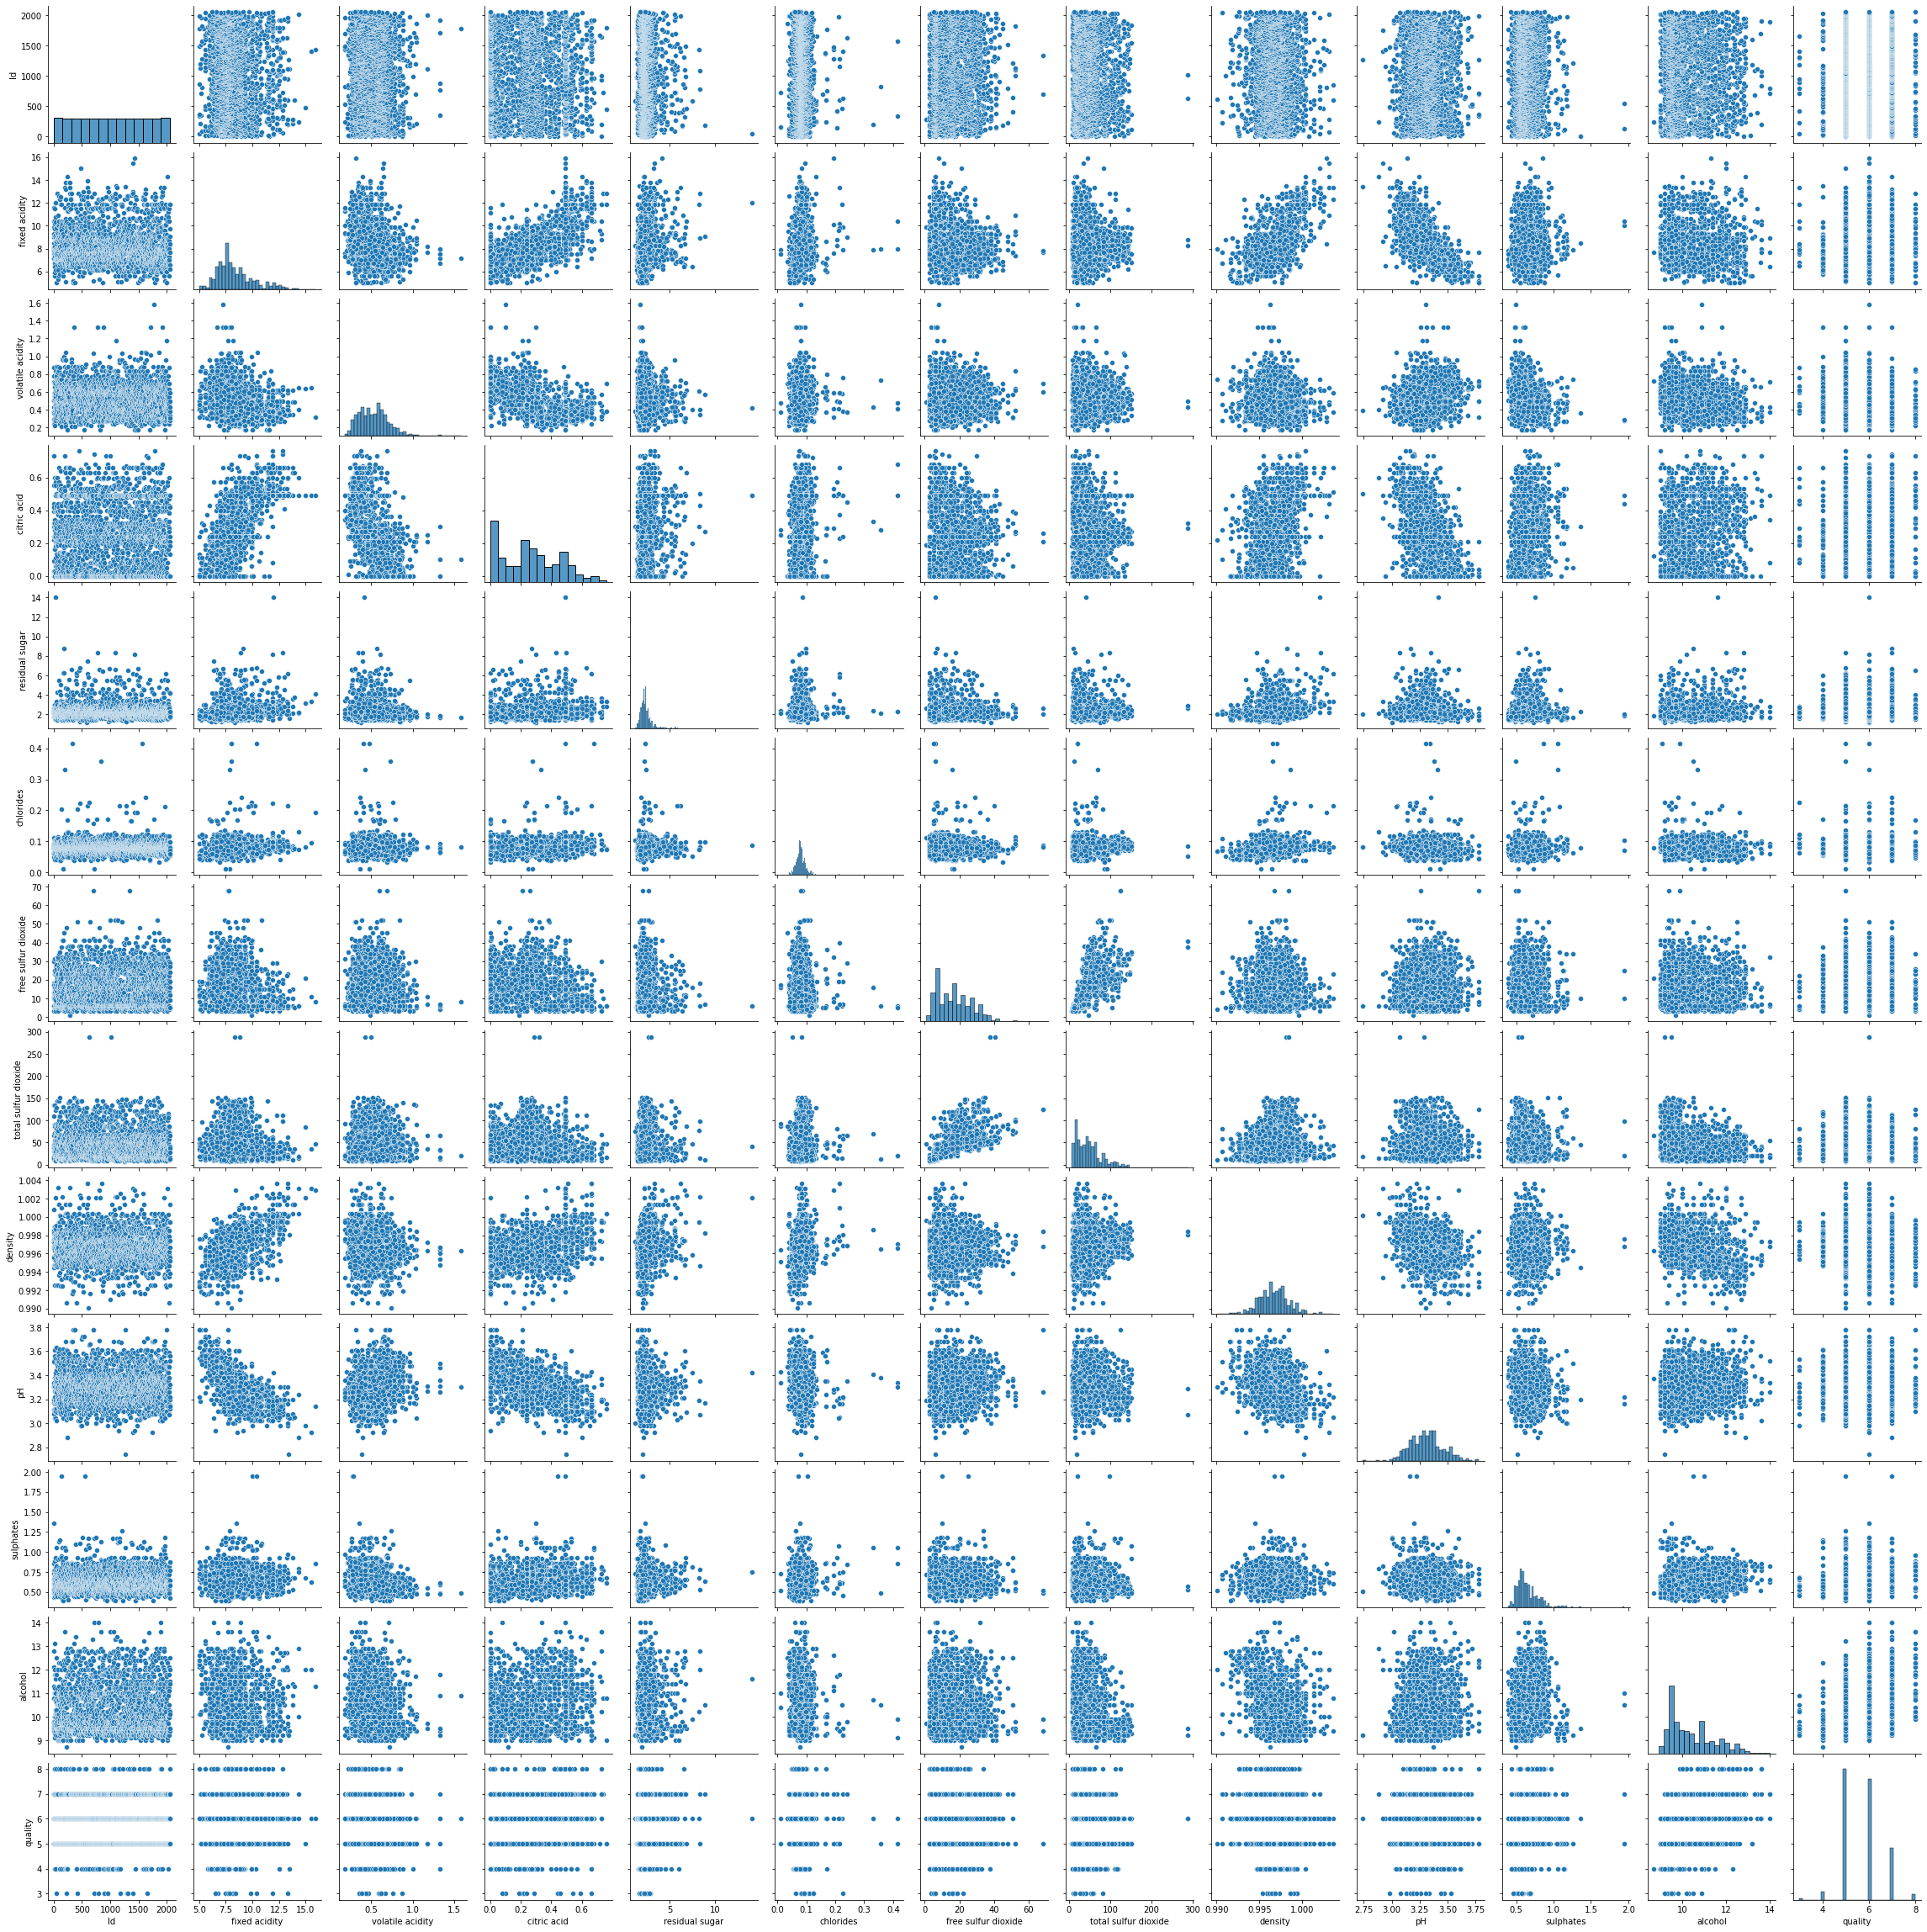

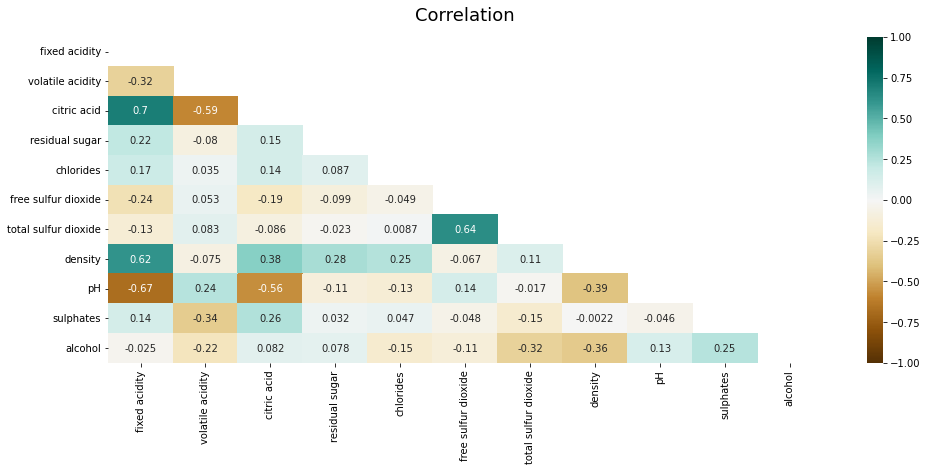

43/43 [==============================] - 0s 3ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>